<h1><center style="font-size: 32px">THELI- Megapipe comparison</center></h1>
<br><br>

In [1]:
import numpy as np
import scipy as sp
from scipy import stats
from astropy import constants as cst
import ldac
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Read stars and galaxies input galsim catalogues

In [2]:
gal_1 = ldac.LDACCat("catalogue_theli.cat")
ra_gal_1,dec_gal_1 = gal_1['OBJECTS']['ALPHA_J2000'],gal_1['OBJECTS']['DELTA_J2000']
rmag_gal_1 = gal_1['OBJECTS']['MAG_AUTO']
size_gal_1 = gal_1['OBJECTS']['FLUX_RADIUS']
rmag_gal_1.size

31276

In [3]:
gal_2 = ldac.LDACCat("catalogue_stephen.cat")
ra_gal_2,dec_gal_2 = gal_2['OBJECTS']['ALPHA_J2000'],gal_2['OBJECTS']['DELTA_J2000']
rmag_gal_2 = gal_2['OBJECTS']['MAG_AUTO']
size_gal_2 = gal_2['OBJECTS']['FLUX_RADIUS']
rmag_gal_2.size

32384

#### size magnitude plot

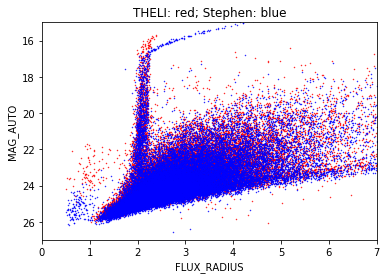

In [4]:
plt.gca().invert_yaxis()
plt.xlabel('FLUX_RADIUS')
plt.ylabel('MAG_AUTO')
plt.title('THELI: red; Stephen: blue')
plt.xlim([0,7])
plt.ylim([27,15])
plt.scatter(size_gal_1,rmag_gal_1,s=0.2,c='red')
plt.scatter(size_gal_2,rmag_gal_2,s=0.2,c='blue')
plt.savefig('size_mag.pdf')

(31276, 32384)

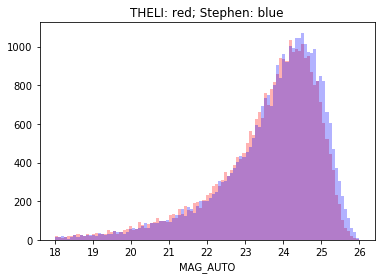

In [5]:
bins=np.linspace(18,26,100)
plt.xlabel('MAG_AUTO')
plt.hist(rmag_gal_1, bins, alpha=0.3,color="red")
plt.hist(rmag_gal_2, bins, alpha=0.3,color="blue")
plt.title('THELI: red; Stephen: blue')
#plt.hist(rmag_coadd[select], bins, alpha=0.3,color="orange")
#plt.hist(rmag_data[idx_data[sep_constraint_data]], bins, alpha=0.5,color="green")
#plt.savefig('mag_distributions.pdf')
#plt.show()
plt.savefig('mag_histo.pdf')
rmag_gal_1.size,rmag_gal_2.size

### Matching the two catalogues

In [6]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [7]:
c_1 = SkyCoord(ra=ra_gal_1*u.degree, dec=dec_gal_1*u.degree)
c_2 = SkyCoord(ra=ra_gal_2*u.degree, dec=dec_gal_2*u.degree)

In [8]:
idx, d2d, d3d = c_1.match_to_catalog_sky(c_2)

In [9]:
max_sep = 1.0 * u.arcsec
sep_constraint = d2d < max_sep
c_1_matches = c_1[sep_constraint]
c_2_matches = c_2[idx[sep_constraint]]
c_1_matches.size,c_2_matches.size

(29867, 29867)

In [60]:
xval = rmag_gal_1[sep_constraint]
yval = rmag_gal_2[idx[sep_constraint]]-rmag_gal_1[sep_constraint]

(array([0.1266933 , 0.12667563, 0.12589769, 0.11578759, 0.11249161,
        0.10308094, 0.09390862, 0.08211748, 0.06378754, 0.02686646]),
 array([18.  , 18.75, 19.5 , 20.25, 21.  , 21.75, 22.5 , 23.25, 24.  ,
        24.75, 25.5 ]),
 array([ 160.,  279.,  488.,  810., 1384., 2260., 3903., 6712., 8356.,
        4318.]))

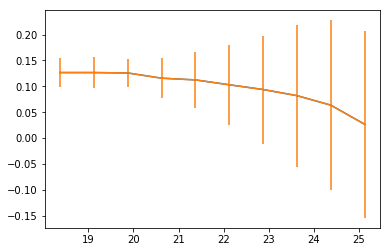

In [79]:
iselect, = np.where(np.abs(yval) <= 0.5)
yval_mean,xval_edges,binnumber = stats.binned_statistic(xval[iselect],yval[iselect],statistic='mean',bins=10,range=[18,25.5])
yval_std,xval_edges,binnumber = stats.binned_statistic(xval[iselect],yval[iselect],statistic='std',bins=10,range=[18,25.5])
counts,xval_edges,binnumber = stats.binned_statistic(xval[iselect],yval[iselect],statistic='count',bins=10,range=[18,25.5])
xval_bins = (xval_edges[:-1] + xval_edges[1:]) / 2
plt.plot(xval_bins,yval_mean)
plt.errorbar(xval_bins,yval_mean,yval_std)
yval_mean,xval_edges,counts

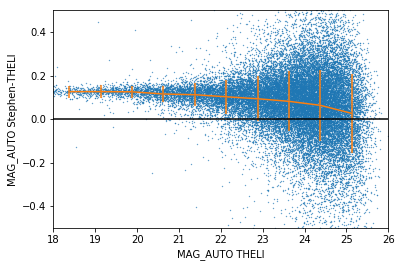

In [82]:
plt.xlabel('MAG_AUTO THELI')
plt.ylabel('MAG_AUTO Stephen-THELI')
plt.scatter(xval,yval,s=0.1)
plt.xlim(18,26)
plt.ylim(-0.5,0.5)
plt.plot(xval_bins,yval_mean)
plt.errorbar(xval_bins,yval_mean,yval_std)
plt.plot([10,26],[0,0],c='black')
plt.savefig('magnitude_matching.pdf')

In [101]:
np.mean(rmag_gal_2[idx[sep_constraint]]-rmag_gal_1[sep_constraint]),stats.mode(rmag_gal_2[idx[sep_constraint]]-rmag_gal_1[sep_constraint])

(0.07718118,
 ModeResult(mode=array([0.07985306], dtype=float32), count=array([4])))

(31276, 32384)

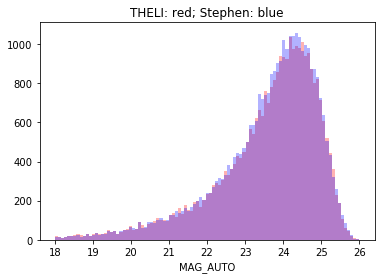

In [96]:
bins=np.linspace(18,26,100)
plt.xlabel('MAG_AUTO')
plt.hist(rmag_gal_1, bins, alpha=0.3,color="red")
plt.hist(rmag_gal_2-0.125, bins, alpha=0.3,color="blue")
plt.title('THELI: red; Stephen: blue')
#plt.hist(rmag_coadd[select], bins, alpha=0.3,color="orange")
#plt.hist(rmag_data[idx_data[sep_constraint_data]], bins, alpha=0.5,color="green")
#plt.savefig('mag_distributions.pdf')
#plt.show()
plt.savefig('mag_histo_shifted_again.pdf')
rmag_gal_1.size,rmag_gal_2.size